In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

import shap


In [3]:
df = pd.read_csv("../data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include="all")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
df['TotalCharges'].isna().sum()


np.int64(0)

In [7]:
df = df.drop(columns=['customerID'])


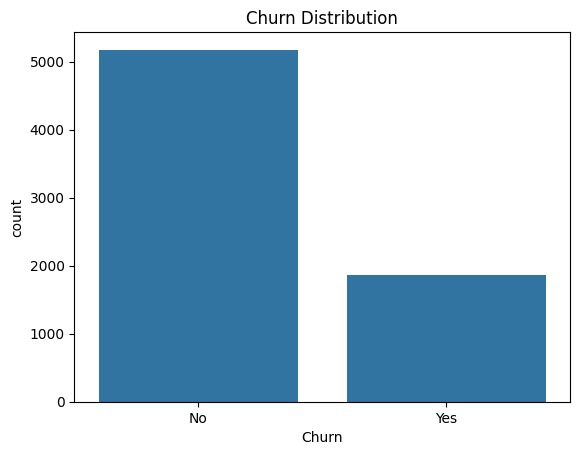

In [8]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


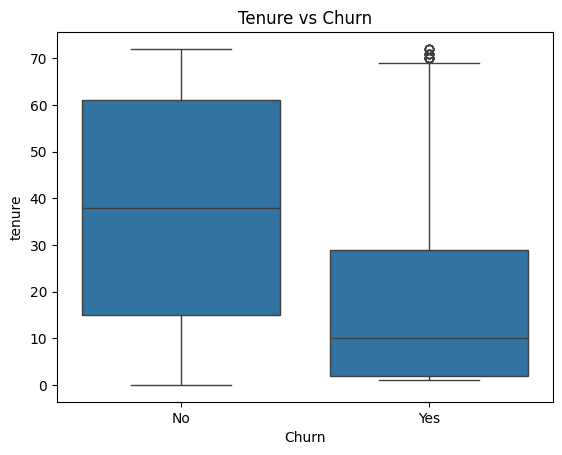

In [9]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


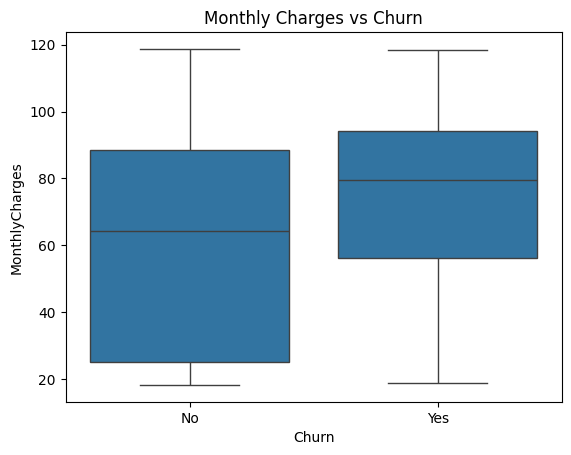

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


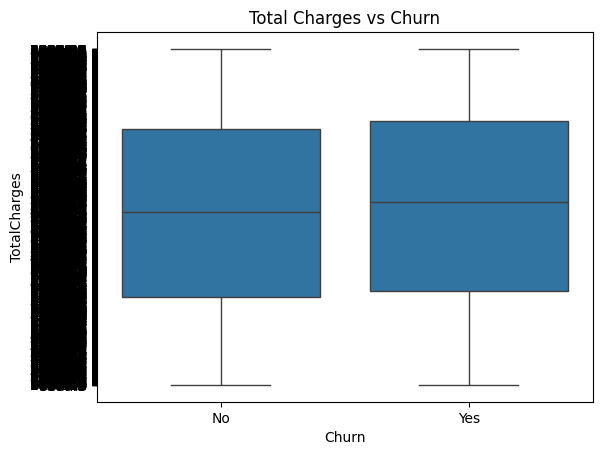

In [12]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


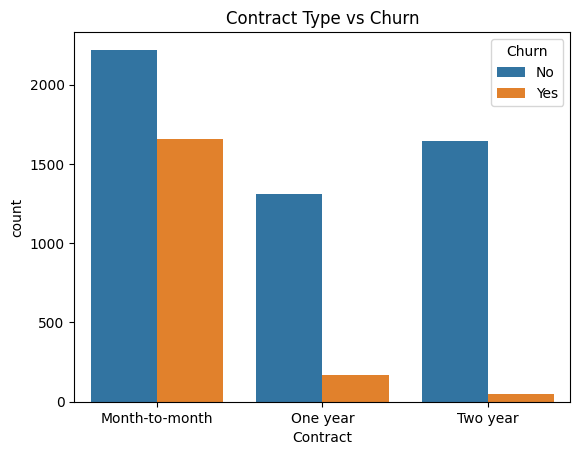

In [13]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


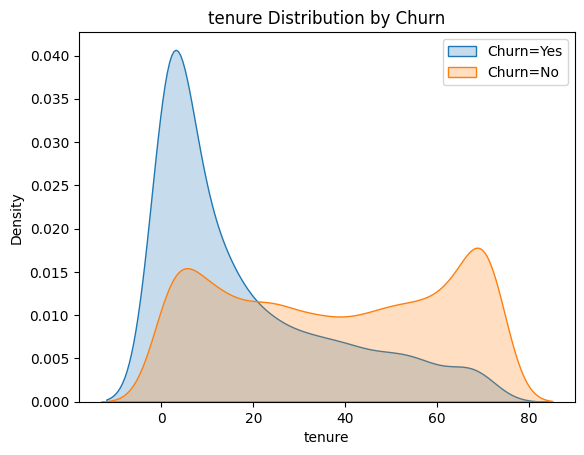

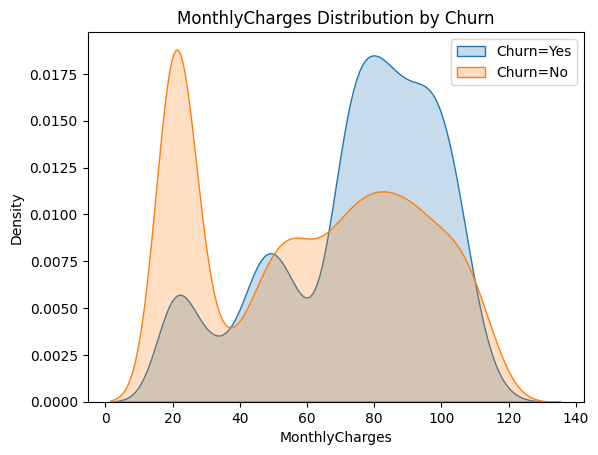

In [15]:
num_cols = ['tenure', 'MonthlyCharges']
for col in num_cols:
    sns.kdeplot(df[df['Churn']=='Yes'][col], label='Churn=Yes', fill=True)
    sns.kdeplot(df[df['Churn']=='No'][col], label='Churn=No', fill=True)
    plt.title(f"{col} Distribution by Churn")
    plt.legend()
    plt.show()


C:\Users\gonep\AppData\Local\Temp\ipykernel_22292\3631990551.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('bin')['Churn'].apply(lambda x: (x=='Yes').mean())


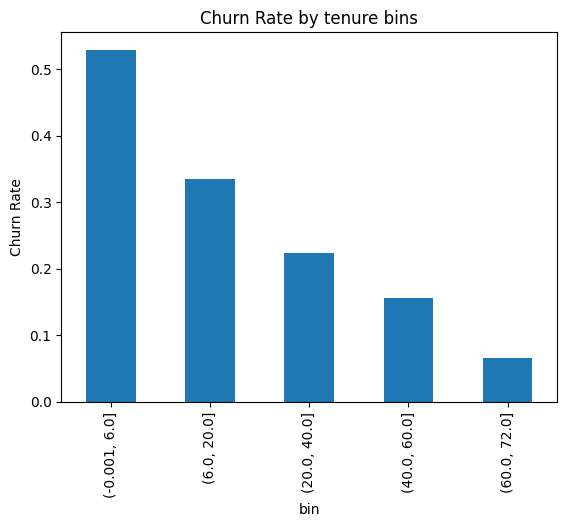

C:\Users\gonep\AppData\Local\Temp\ipykernel_22292\3631990551.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('bin')['Churn'].apply(lambda x: (x=='Yes').mean())


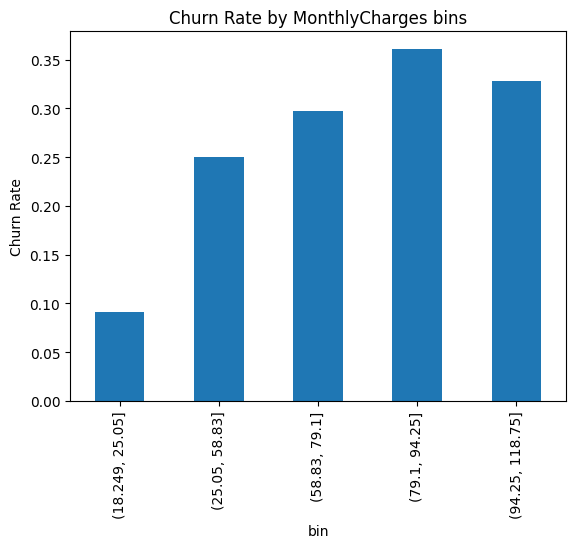

In [16]:
for col in num_cols:
    df['bin'] = pd.qcut(df[col], q=5, duplicates='drop')
    churn_rate = df.groupby('bin')['Churn'].apply(lambda x: (x=='Yes').mean())
    
    churn_rate.plot(kind='bar')
    plt.title(f"Churn Rate by {col} bins")
    plt.ylabel("Churn Rate")
    plt.show()


In [17]:
cat_cols = df.select_dtypes(include='object').columns


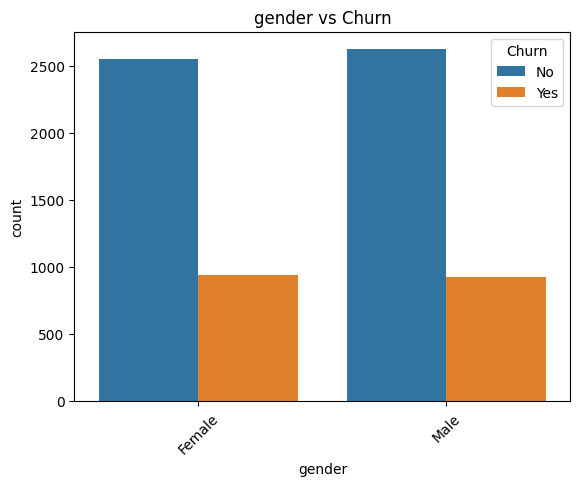

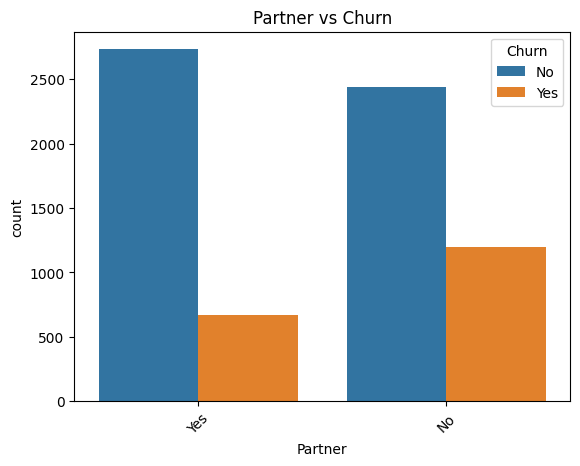

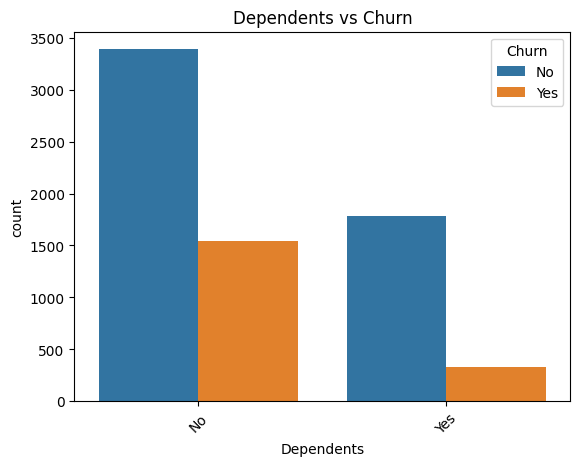

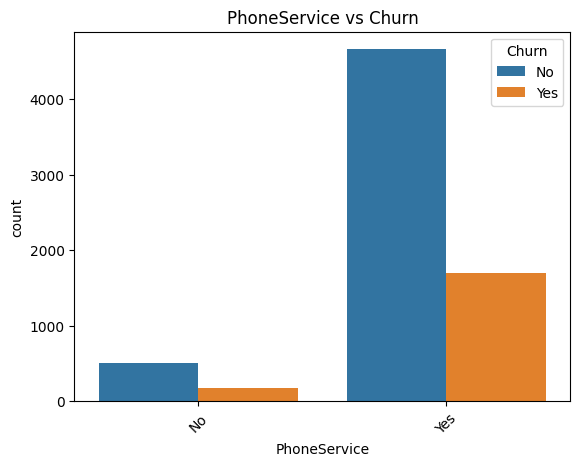

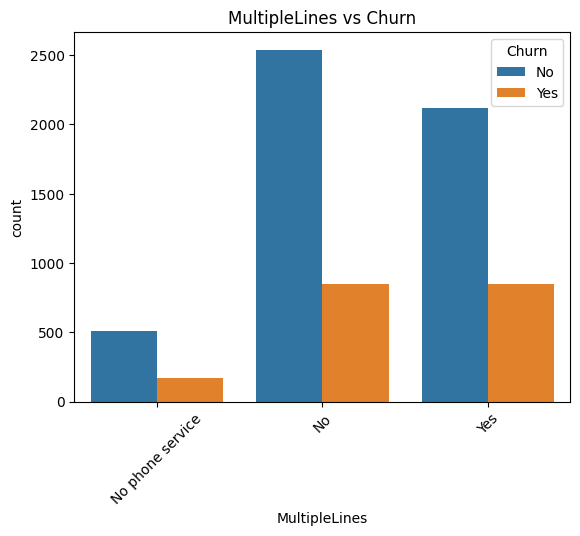

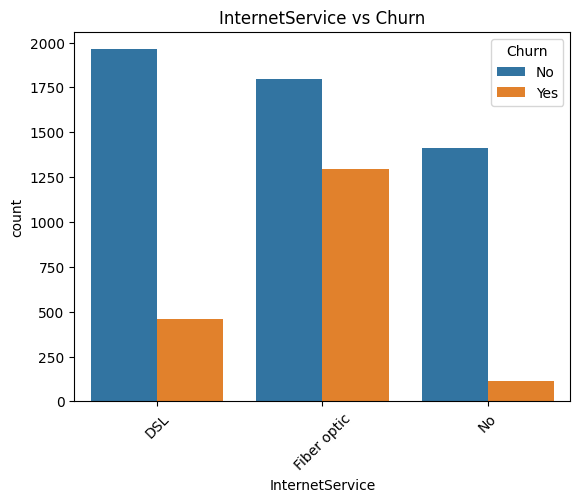

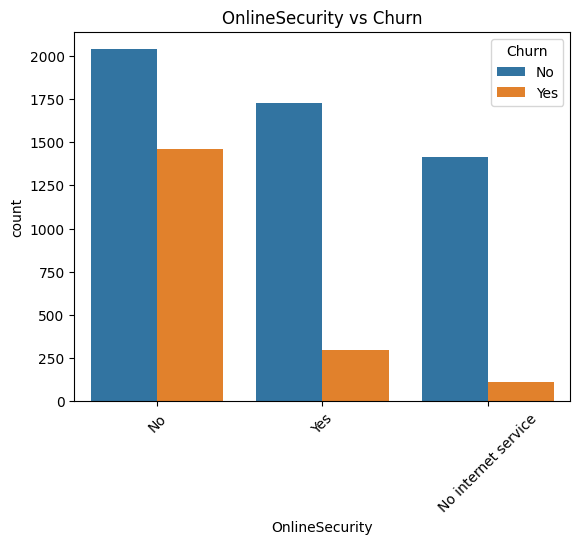

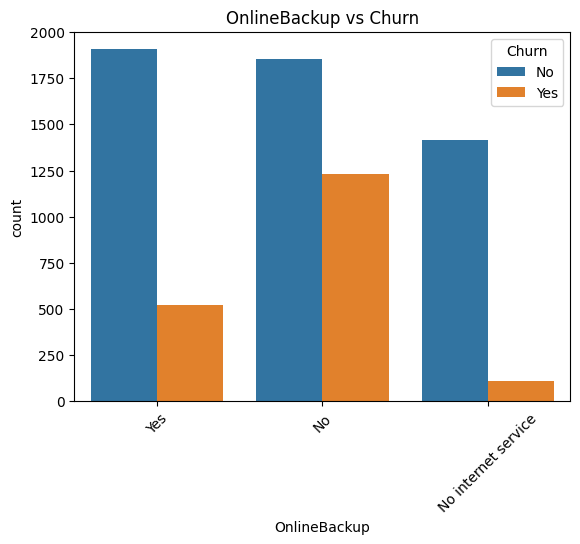

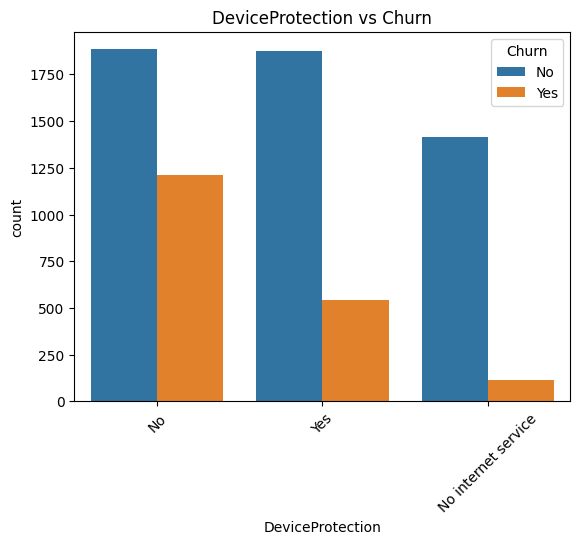

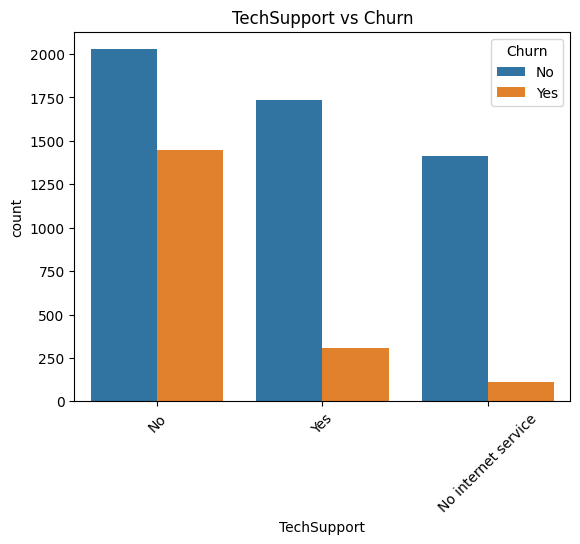

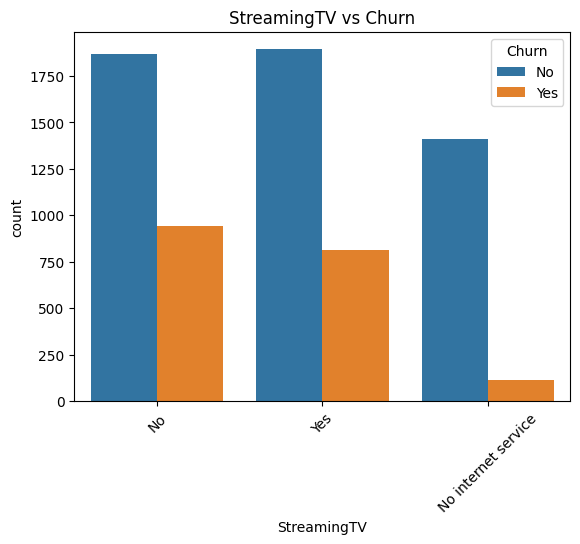

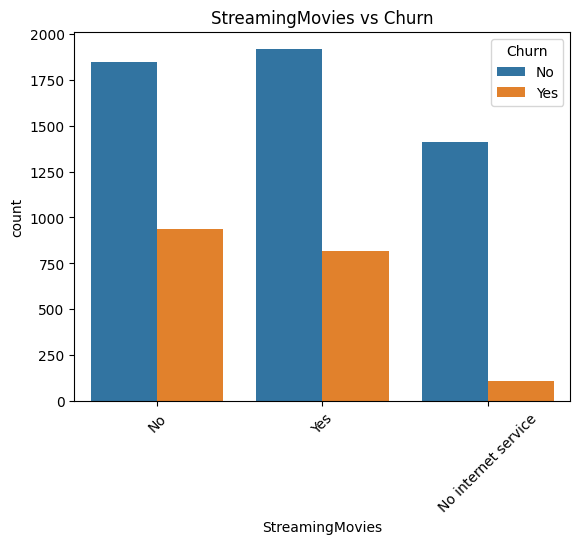

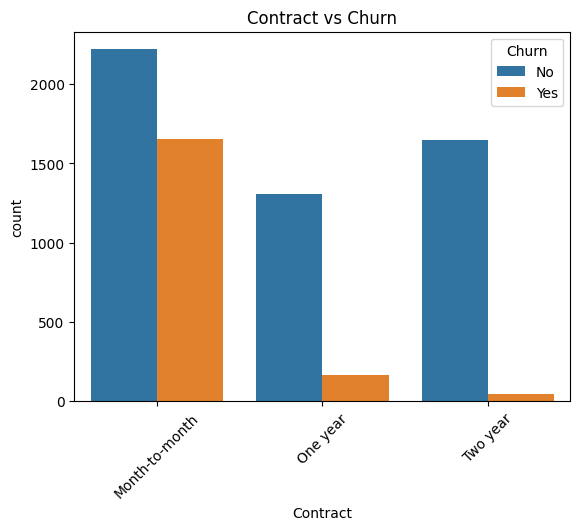

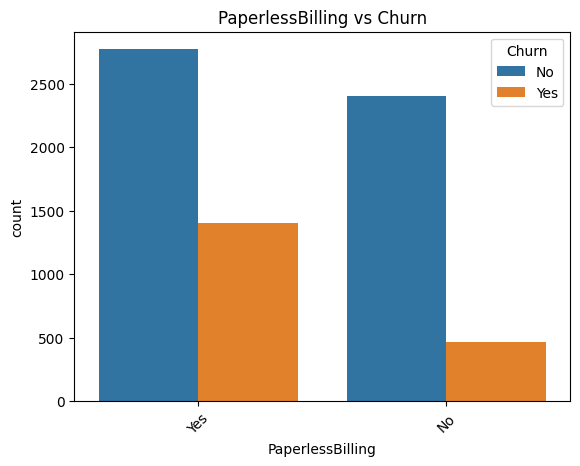

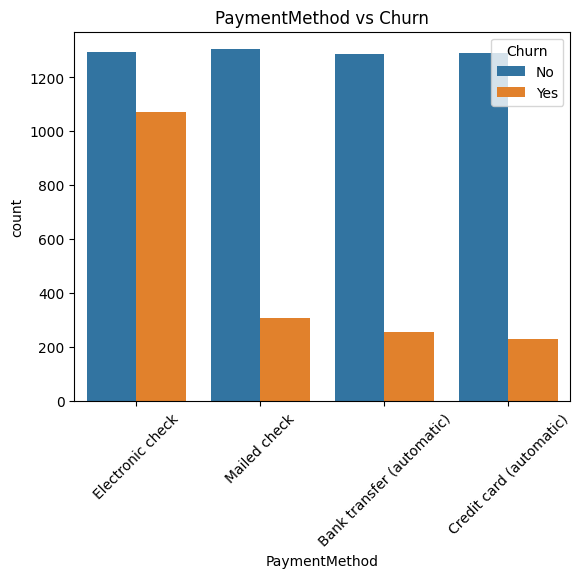

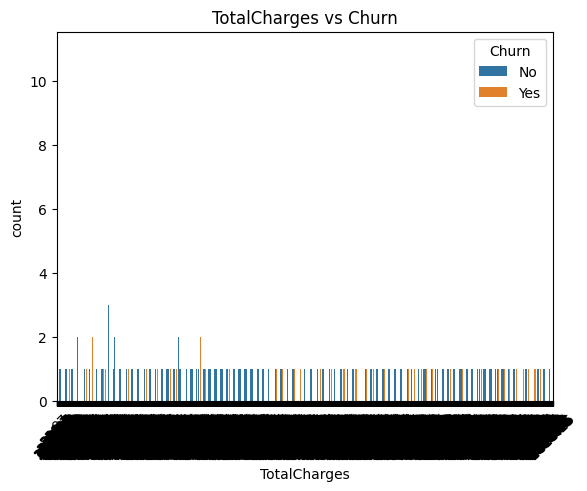

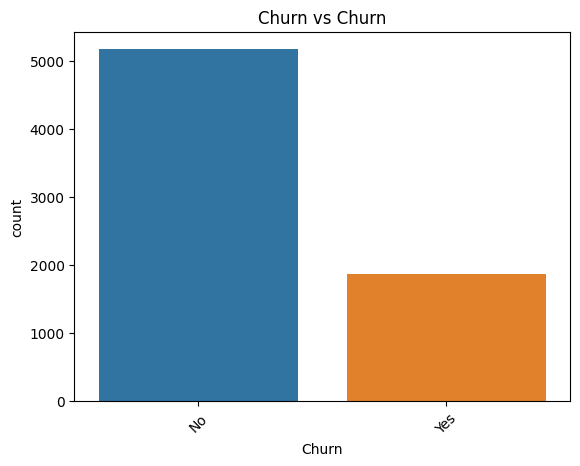

In [18]:
for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


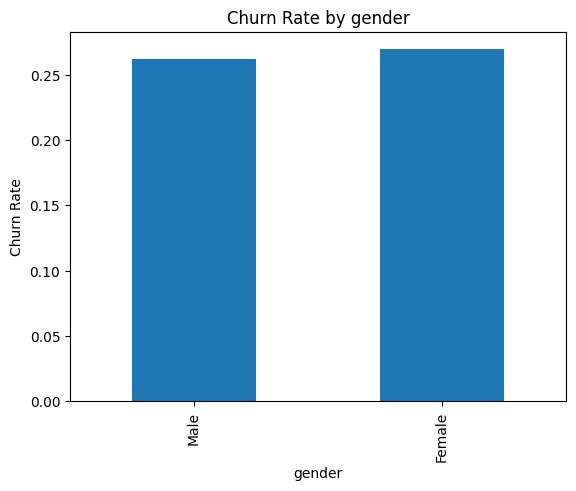

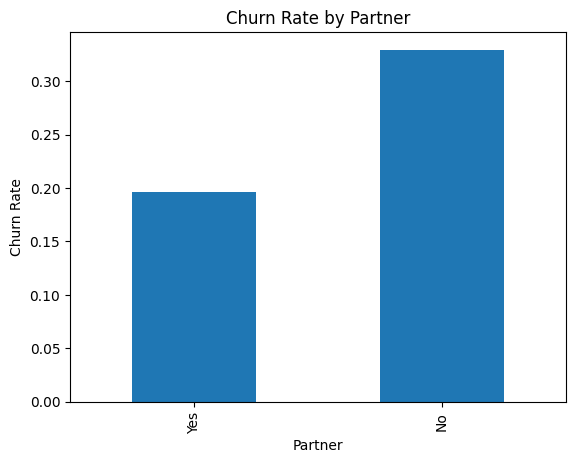

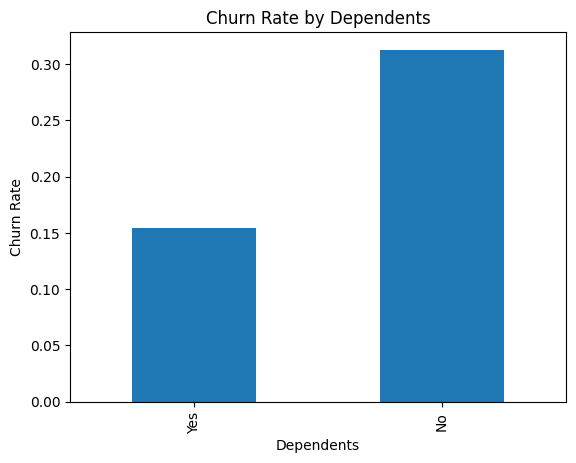

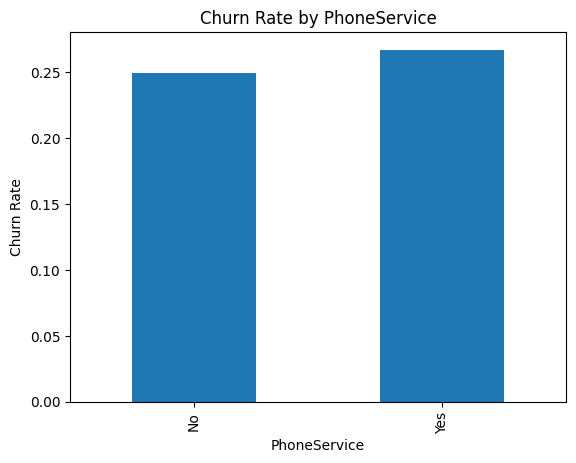

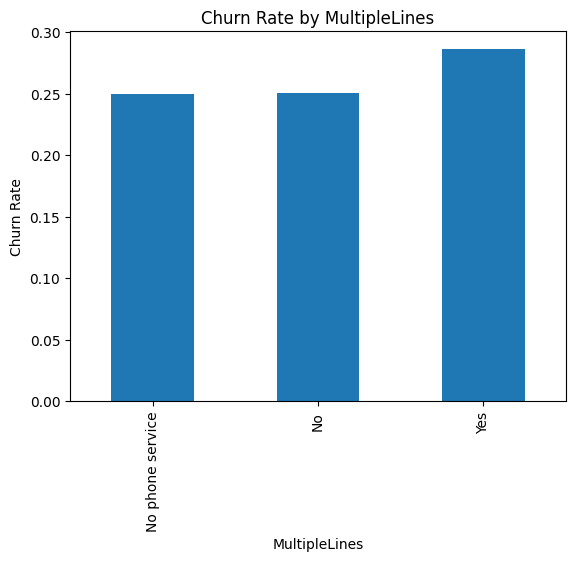

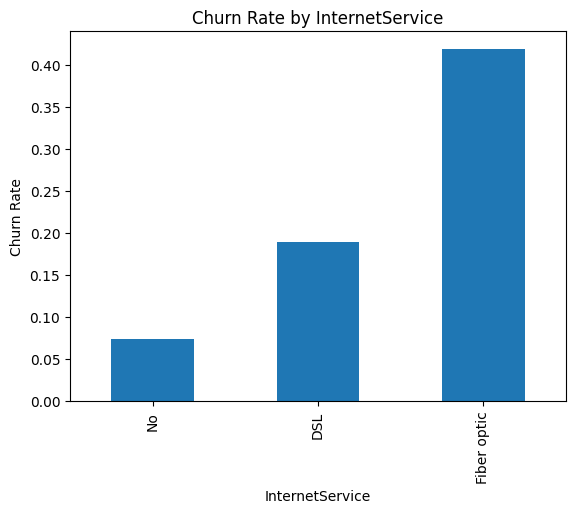

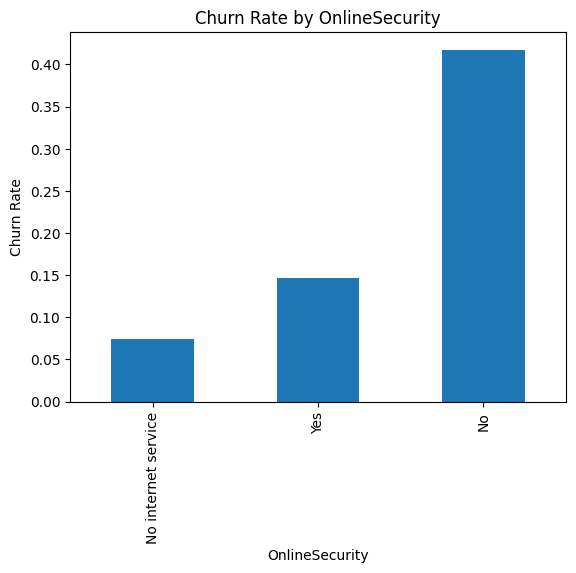

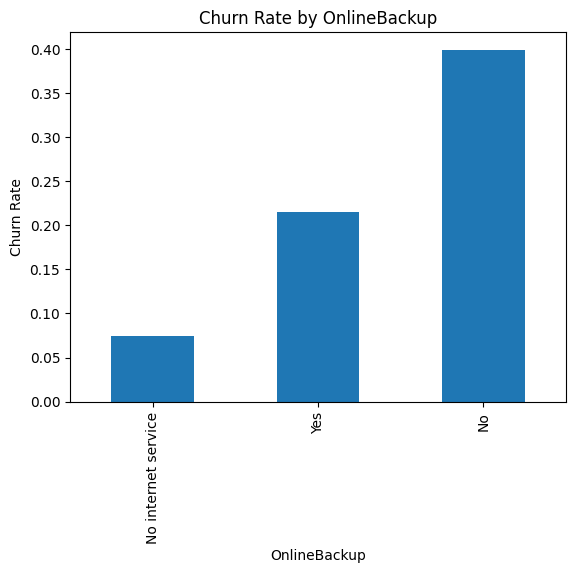

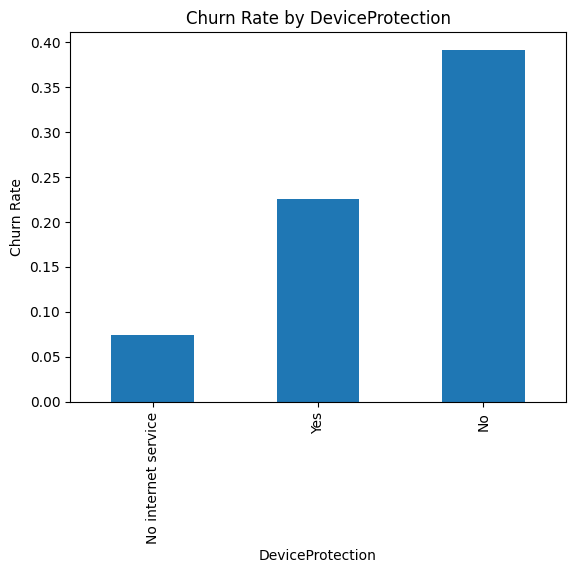

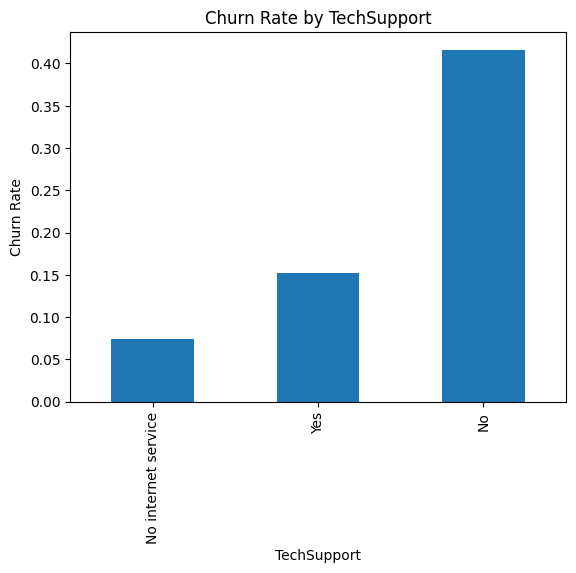

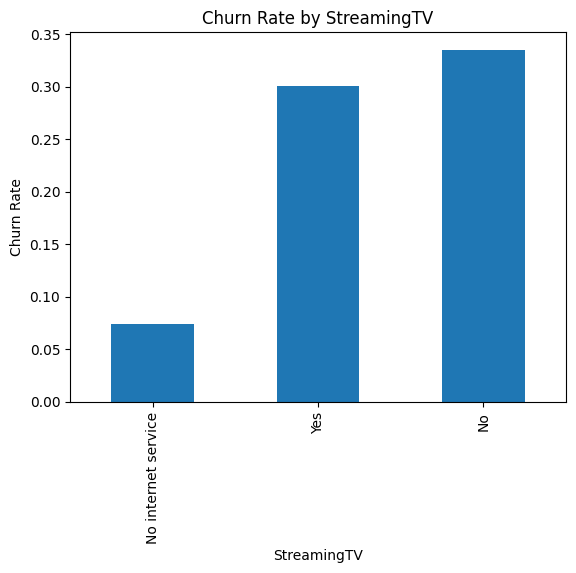

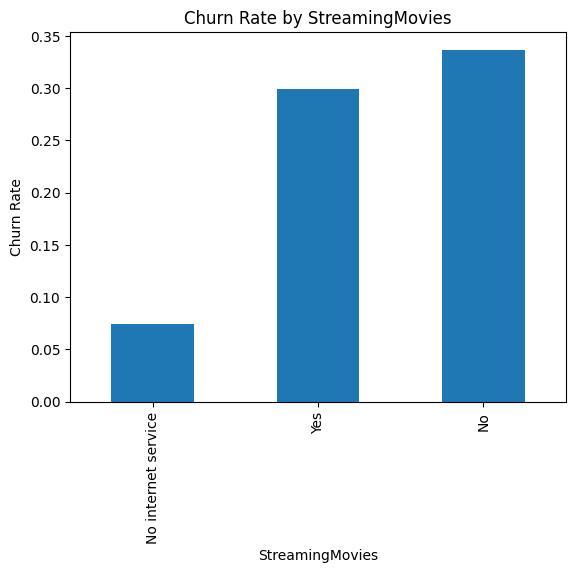

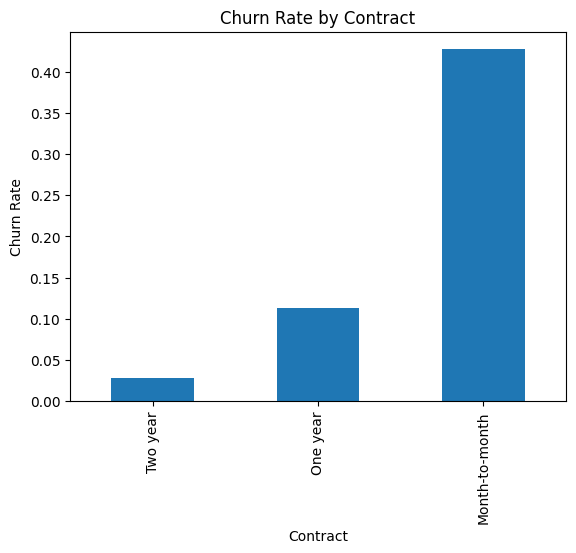

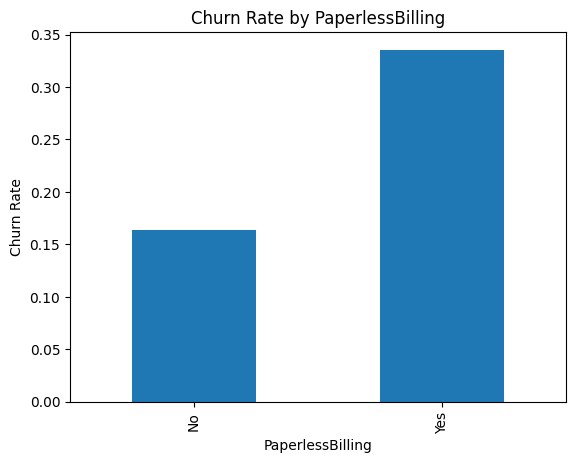

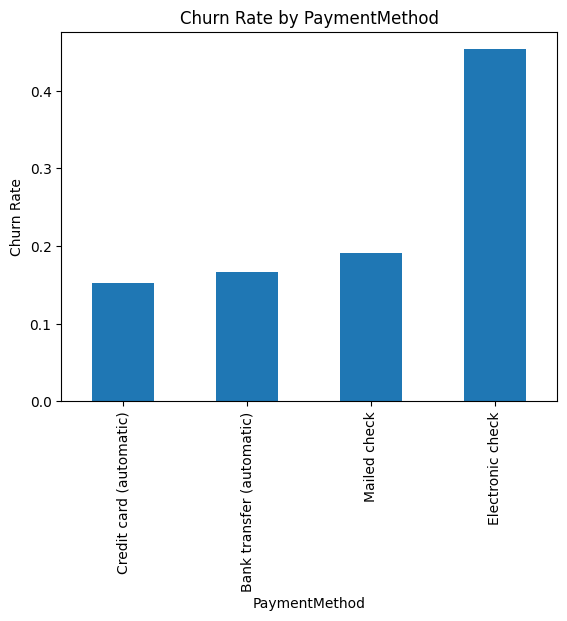

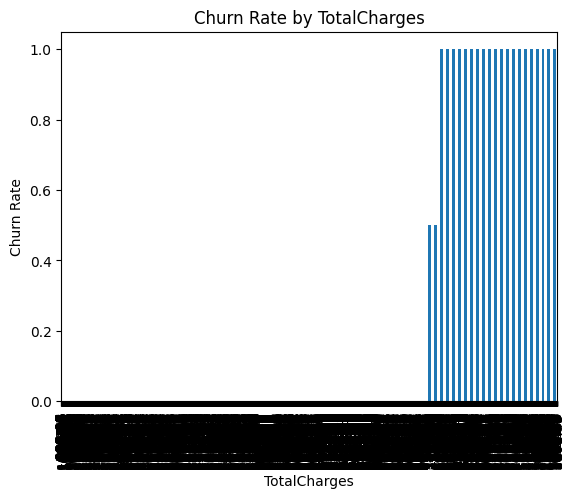

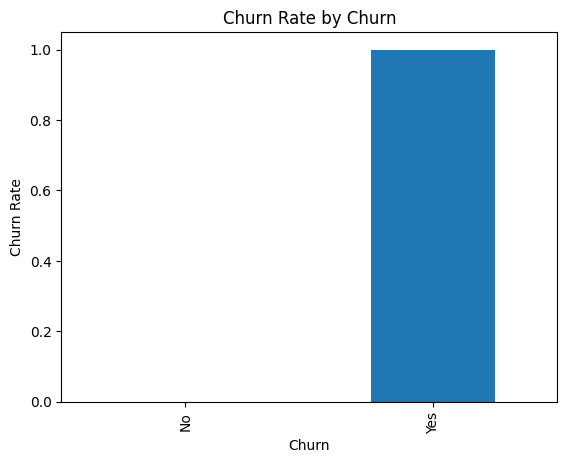

In [19]:
for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean())
    
    churn_rate.sort_values().plot(kind='bar')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()


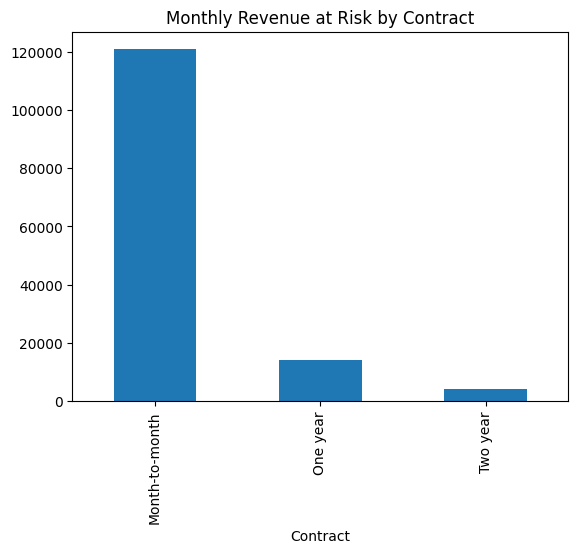

In [21]:
df['RevenueAtRisk'] = np.where(df['Churn']=='Yes', df['MonthlyCharges'], 0)

df.groupby('Contract')['RevenueAtRisk'].sum().plot(kind='bar')
plt.title("Monthly Revenue at Risk by Contract")
plt.show()


In [22]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,bin,RevenueAtRisk
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(25.05, 58.83]",0.00
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,0,"(25.05, 58.83]",0.00
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(25.05, 58.83]",53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(25.05, 58.83]",0.00
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(58.83, 79.1]",70.70


In [25]:
df_encoded.shape


(7043, 6565)

In [36]:
df['TotalCharges'] = pd.to_numeric(
    df['TotalCharges'],
    errors='coerce'
)


In [37]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [38]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = df.drop(columns=numeric_cols + ['Churn']).columns

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [39]:
X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [40]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear'
)

log_reg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [42]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1294
           1       0.61      0.81      0.69       467

    accuracy                           0.81      1761
   macro avg       0.76      0.81      0.78      1761
weighted avg       0.84      0.81      0.82      1761

ROC AUC: 0.8985053731768101


In [45]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(30)


,Feature,Coefficient
48,RevenueAtRisk_19.75,2.992654
56,RevenueAtRisk_20.15,2.684318
41,RevenueAtRisk_19.4,2.418681
414,RevenueAtRisk_73.9,2.137281
46,RevenueAtRisk_19.65,2.106441
51,RevenueAtRisk_19.9,2.081082
275,RevenueAtRisk_55.0,2.012222
58,RevenueAtRisk_20.25,2.005178
57,RevenueAtRisk_20.2,1.997121
60,RevenueAtRisk_20.35,1.990574


In [47]:
coef_df['OddsRatio'] = np.exp(coef_df['Coefficient'])
coef_df.sort_values(by='OddsRatio', ascending=False).head(10)


,Feature,Coefficient,OddsRatio
48,RevenueAtRisk_19.75,2.992654,19.938532
56,RevenueAtRisk_20.15,2.684318,14.648201
41,RevenueAtRisk_19.4,2.418681,11.231033
414,RevenueAtRisk_73.9,2.137281,8.476357
46,RevenueAtRisk_19.65,2.106441,8.218938
51,RevenueAtRisk_19.9,2.081082,8.013132
275,RevenueAtRisk_55.0,2.012222,7.479916
58,RevenueAtRisk_20.25,2.005178,7.427418
57,RevenueAtRisk_20.2,1.997121,7.367817
60,RevenueAtRisk_20.35,1.990574,7.319732


In [48]:
import shap

explainer = shap.Explainer(
    log_reg,
    X_train,
    feature_names=X_train.columns
)


In [49]:
shap_values = explainer(X_test)


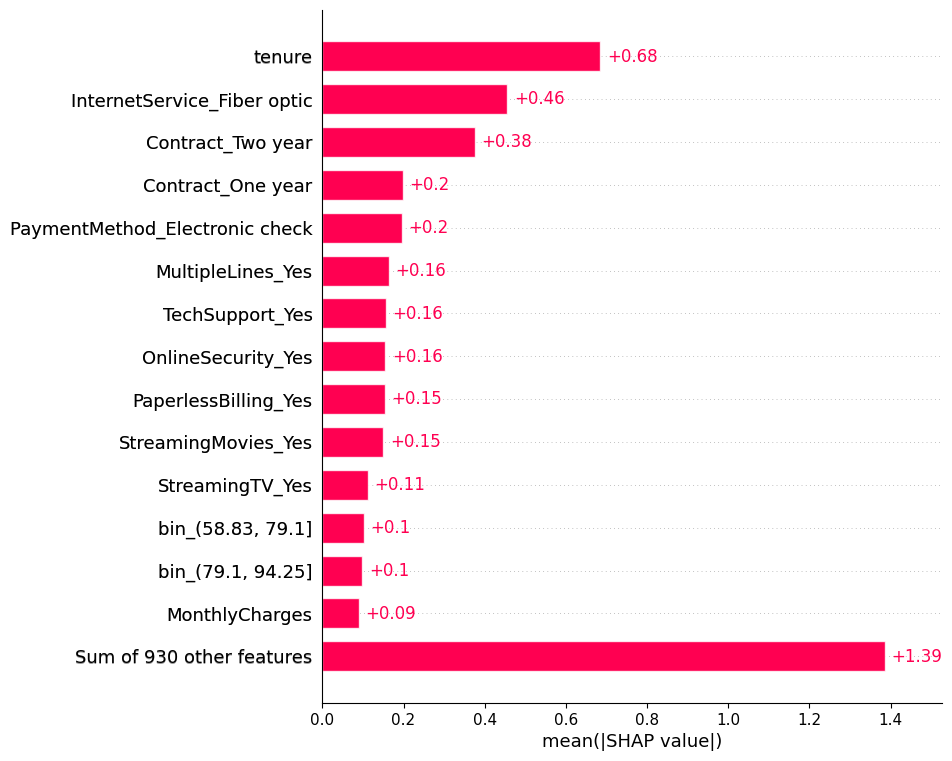

In [50]:
shap.plots.bar(shap_values, max_display=15)


5


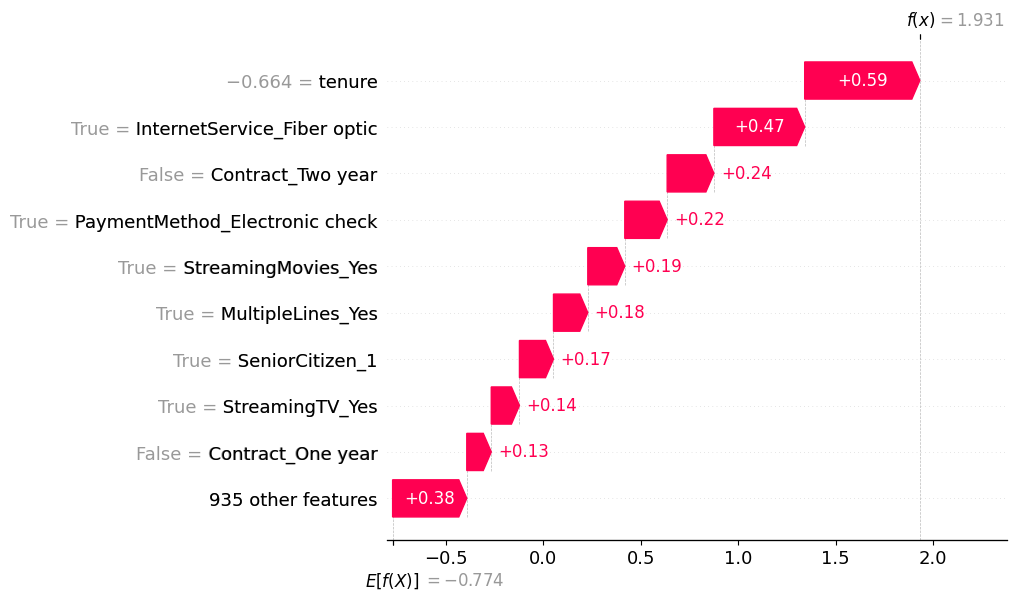

In [51]:
churn_positions = np.where(y_test.values == 1)[0]
idx = churn_positions[0]
print(idx)

shap.plots.waterfall(shap_values[idx])


In [52]:
from sklearn.metrics import confusion_matrix

thresholds = np.arange(0.1, 0.9, 0.01)
total_costs = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    cost = (
        tp * (-500) +
        fp * 200 +
        fn * 3000 +
        tn * 0
    )
    total_costs.append(cost)

best_threshold = thresholds[np.argmin(total_costs)]
best_threshold


np.float64(0.11)

In [53]:
y_pred_opt = (y_prob >= best_threshold).astype(int)
classification_report(y_test, y_pred_opt)

'              precision    recall  f1-score   support\n\n           0       0.99      0.39      0.56      1294\n           1       0.37      0.99      0.54       467\n\n    accuracy                           0.55      1761\n   macro avg       0.68      0.69      0.55      1761\nweighted avg       0.82      0.55      0.55      1761\n'

In [54]:
roc_auc_score(y_test, y_prob)


0.8985053731768101

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",50
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [56]:
rf_probs = rf.predict_proba(X_test)[:, 1]


In [57]:
from sklearn.metrics import confusion_matrix

def business_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (
        tp * (-500) +   # retained customer
        fp * 200 +      # unnecessary incentive
        fn * 3000 +     # missed churner
        tn * 0
    )


In [58]:
thresholds = np.linspace(0.01, 0.99, 99)
rf_costs = []

for t in thresholds:
    y_pred_t = (rf_probs >= t).astype(int)
    cost = business_cost(y_test, y_pred_t)
    rf_costs.append(cost)

best_rf_threshold = thresholds[np.argmin(rf_costs)]
best_rf_cost = min(rf_costs)

best_rf_threshold, best_rf_cost


(np.float64(0.37), np.int64(-16600))

In [59]:

rf_pred_opt = (rf_probs >= best_rf_threshold).astype(int)

print(classification_report(y_test, rf_pred_opt))
print("ROC AUC:", roc_auc_score(y_test, rf_probs))


              precision    recall  f1-score   support

           0       1.00      0.18      0.30      1294
           1       0.30      1.00      0.47       467

    accuracy                           0.39      1761
   macro avg       0.65      0.59      0.38      1761
weighted avg       0.81      0.39      0.34      1761

ROC AUC: 0.822714951894595


In [60]:
explainer = shap.TreeExplainer(
    rf,
    feature_perturbation="tree_path_dependent"
)

shap_values = explainer.shap_values(X_test)


In [61]:
shap_values.shape

(1761, 944, 2)

In [62]:
shap_values_churn = shap_values[:, :, 1]
shap_values_churn.shape

(1761, 944)

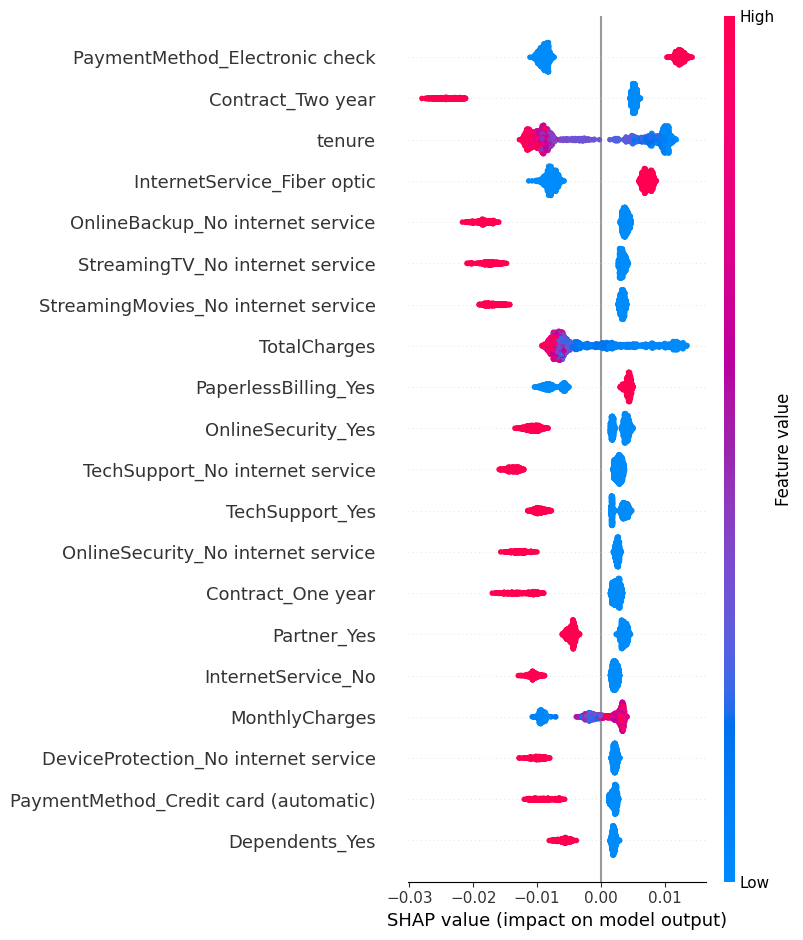

In [63]:
shap.summary_plot(shap_values_churn, X_test)


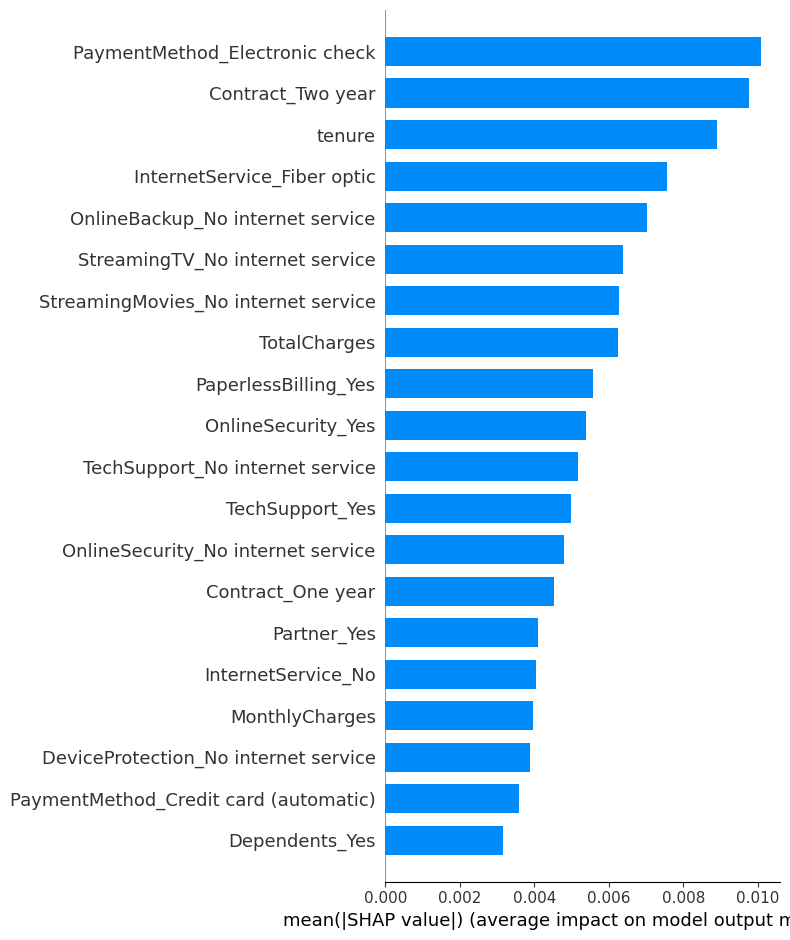

In [64]:
shap.summary_plot(shap_values_churn, X_test, plot_type="bar")


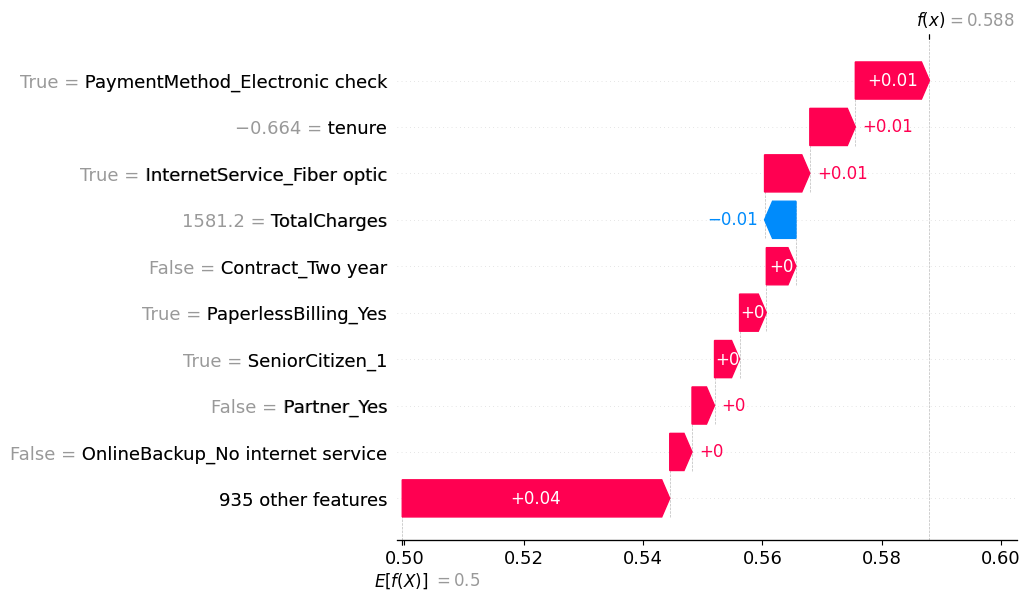

In [65]:
import numpy as np

idx = np.where(y_test.values == 1)[0][0]

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_churn[idx],
        base_values=explainer.expected_value[1],
        data=X_test.iloc[idx],
        feature_names=X_test.columns
    )
)


In [67]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(
    ['mean', 'median', 'std']
)

tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
0      37.569965   38.0  24.113777      61.265124  64.425  31.092648   
1      17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                         
              mean    median          std  
Churn                                      
0      2549.911442  1679.525  2329.954215  
1      1531.796094   703.550  1890.822994

In [68]:
df['tenure_cohort'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 36, 60, 72],
    labels=['0–6m', '6–12m', '12–24m', '24–36m', '36–60m', '60m+']
)


In [69]:
cohort_churn = (
    df.groupby('tenure_cohort')['Churn']
      .mean()
      .reset_index()
)

cohort_churn


C:\Users\gonep\AppData\Local\Temp\ipykernel_22292\2175274812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_cohort')['Churn']


,tenure_cohort,Churn
0,0–6m,0.533333
1,6–12m,0.358865
2,12–24m,0.287109
3,24–36m,0.216346
4,36–60m,0.166248
5,60m+,0.066098


<Axes: xlabel='timeline'>

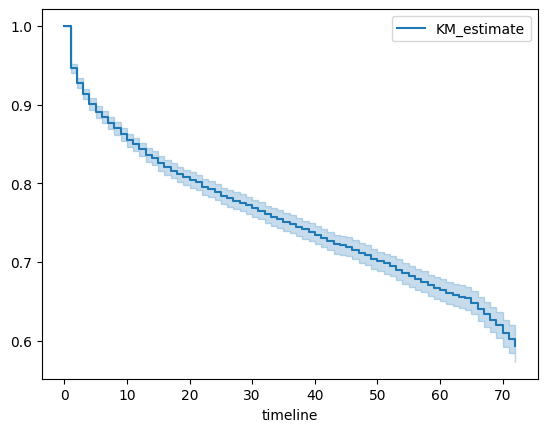

In [70]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

T = df['tenure']          # time
E = df['Churn']           # event occurred
kmf.fit(T, event_observed=E)
kmf.plot_survival_function()


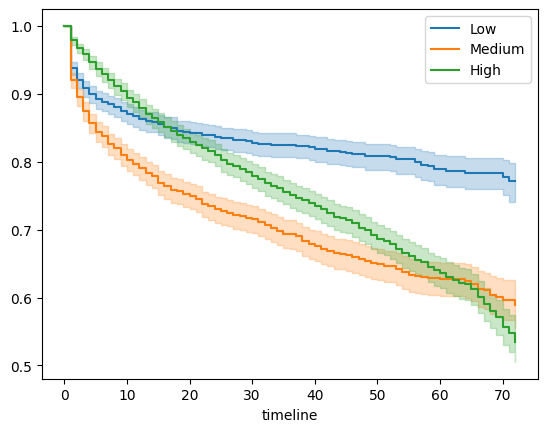

In [71]:
df['price_segment'] = pd.qcut(df['MonthlyCharges'], q=3, labels=['Low', 'Medium', 'High'])

for seg in df['price_segment'].unique():
    kmf.fit(
        df[df['price_segment'] == seg]['tenure'],
        df[df['price_segment'] == seg]['Churn'],
        label=seg
    )
    kmf.plot_survival_function()


In [72]:
churn_rate = df['Churn'].mean()
arpu = df['MonthlyCharges'].mean()
avg_tenure = df['tenure'].mean()
print(churn_rate)
print(arpu)
print(avg_tenure)
clv = arpu * avg_tenure
print(clv)
# If we reduce churn by 5% in first 6 months, expected savings =
# customers × ARPU × tenure_saved


0.2653698707936959
64.76169246059918
32.37114865824223
2096.4103740014207


In [ ]:
# | Insight                   | Evidence          | Decision             |
# | ------------------------- | ----------------- | -------------------- |
# | Early churn high          | Cohort + Survival | Early-life offers    |
# | High charges drive churn  | SHAP              | Pricing optimization |
# | Payment friction          | SHAP              | Auto-pay incentives  |
# | Low engagement            | SHAP              | Bundle trials        |
# | Senior citizens sensitive | SHAP              | Specialized plans    |


In [73]:
#Policy Simulation
top_risk = rf_probs >= np.percentile(rf_probs, 80)
print(sum(top_risk))
expected_savings = (
    sum(top_risk) * 3000 - sum(top_risk) * 500
)

print(expected_savings)
# Offer ₹500 discount to top 20% risk customers

353
882500


In [74]:
df_eval = X_test.copy()
df_eval['churn_prob'] = rf_probs
df_eval['SeniorCitizen'] = df.loc[X_test.index, 'SeniorCitizen']

df_eval.groupby('SeniorCitizen')['churn_prob'].mean()


SeniorCitizen
0    0.470318
1    0.529086
Name: churn_prob, dtype: float64